# First look at the Santa 2023 Problem

This notebook was created during the twitch/youtube stream you can watch here:

https://www.youtube.com/watch?v=hNLJwpyN9iE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Understanding the Data

In [2]:
info = pd.read_csv('/kaggle/input/santa-2023/puzzle_info.csv')
puzzles = pd.read_csv('/kaggle/input/santa-2023/puzzles.csv')
ss = pd.read_csv('/kaggle/input/santa-2023/sample_submission.csv')

## Basic info about the problem:
- We have 398 different "puzzles" to solve.
- 27 different types of puzzles.

In [3]:
puzzles.shape, info.shape, ss.shape

((398, 5), (26, 2), (398, 2))

## The Puzzles contain the:
- unique id
- Type of puzzle
- solution state
- Initial state
- Number of wildcards


In [4]:
puzzles.head()

,id,puzzle_type,solution_state,initial_state,num_wildcards
0,0,cube_2/2/2,A;A;A;A;B;B;B;B;C;C;C;C;D;D;D;D;E;E;E;E;F;F;F;F,D;E;D;A;E;B;A;B;C;A;C;A;D;C;D;F;F;F;E;E;B;F;B;C,0
1,1,cube_2/2/2,A;A;A;A;B;B;B;B;C;C;C;C;D;D;D;D;E;E;E;E;F;F;F;F,D;E;C;B;B;E;F;A;F;D;B;F;F;E;B;D;A;A;C;D;C;E;A;C,0
2,2,cube_2/2/2,A;A;A;A;B;B;B;B;C;C;C;C;D;D;D;D;E;E;E;E;F;F;F;F,E;F;C;C;F;A;D;D;B;B;A;F;E;B;C;A;A;B;D;F;E;E;C;D,0
3,3,cube_2/2/2,A;A;A;A;B;B;B;B;C;C;C;C;D;D;D;D;E;E;E;E;F;F;F;F,A;C;E;C;F;D;E;D;A;A;F;A;B;D;B;F;E;D;B;F;B;C;C;E,0
4,4,cube_2/2/2,A;A;A;A;B;B;B;B;C;C;C;C;D;D;D;D;E;E;E;E;F;F;F;F,E;D;E;D;A;E;F;B;A;C;F;D;F;D;C;A;F;B;C;C;B;E;B;A,0


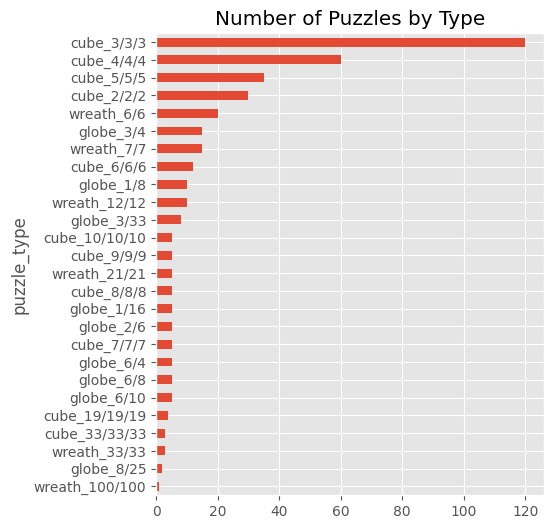

In [5]:
fig, ax = plt.subplots(figsize=(5, 6))
puzzles['puzzle_type'].value_counts().sort_values().plot(kind='barh', ax=ax)
ax.set_title('Number of Puzzles by Type')
plt.show()

## Wildcards
- How many, what type of puzzles have wildcards?

In [6]:
puzzles.groupby(['puzzle_type'])['num_wildcards'].value_counts() \
    .unstack().fillna(0).astype('int').sort_values(0) \
    .style.background_gradient()

num_wildcards,0,2,4,6,8,10,12,16,18,34,38,42,54,176
puzzle_type,,,,,,,,,,,,,,
wreath_100/100,0,0,0,0,1,0,0,0,0,0,0,0,0,0
globe_6/10,1,1,0,1,2,0,0,0,0,0,0,0,0,0
wreath_33/33,2,0,0,0,1,0,0,0,0,0,0,0,0,0
globe_8/25,2,0,0,0,0,0,0,0,0,0,0,0,0,0
cube_19/19/19,3,0,0,0,0,0,0,0,0,0,0,0,0,1
cube_33/33/33,3,0,0,0,0,0,0,0,0,0,0,0,0,0
globe_2/6,3,1,1,0,0,0,0,0,0,0,0,0,0,0
cube_8/8/8,3,0,0,0,0,0,0,0,1,1,0,0,0,0
cube_9/9/9,3,0,0,0,0,0,0,1,0,0,1,0,0,0


# Try to Solve 2x2 Example

In [7]:
from pprint import pprint

twoxtwo_moves = eval(info.loc[info['puzzle_type'] == 'cube_2/2/2']['allowed_moves'].values[0])
print('The available moves for a 2x2x2 cube')
print(twoxtwo_moves.keys())

example = puzzles.loc[0]
print('Example data for 2x2x2')
example

The available moves for a 2x2x2 cube
dict_keys(['f0', 'f1', 'r0', 'r1', 'd0', 'd1'])
Example data for 2x2x2


id                                                              0
puzzle_type                                            cube_2/2/2
solution_state    A;A;A;A;B;B;B;B;C;C;C;C;D;D;D;D;E;E;E;E;F;F;F;F
initial_state     D;E;D;A;E;B;A;B;C;A;C;A;D;C;D;F;F;F;E;E;B;F;B;C
num_wildcards                                                   0
Name: 0, dtype: object

In [8]:
sol = example['solution_state']
init = example['initial_state']

moves = info.loc[info['puzzle_type'] == example['puzzle_type']]['allowed_moves'].values[0]
moves = eval(moves)

In [9]:
# Convert to numpy array
init = np.array(init.split(';'))
sol = np.array(sol.split(';'))


In [10]:
print(init)
print(sol)

['D' 'E' 'D' 'A' 'E' 'B' 'A' 'B' 'C' 'A' 'C' 'A' 'D' 'C' 'D' 'F' 'F' 'F'
 'E' 'E' 'B' 'F' 'B' 'C']
['A' 'A' 'A' 'A' 'B' 'B' 'B' 'B' 'C' 'C' 'C' 'C' 'D' 'D' 'D' 'D' 'E' 'E'
 'E' 'E' 'F' 'F' 'F' 'F']


In [11]:
np.all(init == sol)

False

# How do we apply a move to the cube?

In [12]:
init

array(['D', 'E', 'D', 'A', 'E', 'B', 'A', 'B', 'C', 'A', 'C', 'A', 'D',
       'C', 'D', 'F', 'F', 'F', 'E', 'E', 'B', 'F', 'B', 'C'], dtype='<U1')

In [13]:
# f0 moves are as follows
np.array(moves['f0'])

array([ 0,  1, 19, 17,  6,  4,  7,  5,  2,  9,  3, 11, 12, 13, 14, 15, 16,
       20, 18, 21, 10,  8, 22, 23])

In [14]:
# Apply the move "f0"
init[moves['f0']]

array(['D', 'E', 'E', 'F', 'A', 'E', 'B', 'B', 'D', 'A', 'A', 'A', 'D',
       'C', 'D', 'F', 'F', 'B', 'E', 'F', 'C', 'C', 'B', 'C'], dtype='<U1')

## How to apply an "inverse" move?
- Need to figure this out

In [15]:
# moves['f0']

In [16]:
f0_inv = np.argsort(moves['f0'])

In [17]:
init[f0_inv]

array(['D', 'E', 'C', 'C', 'B', 'B', 'E', 'A', 'F', 'A', 'B', 'A', 'D',
       'C', 'D', 'F', 'F', 'A', 'E', 'D', 'F', 'E', 'B', 'C'], dtype='<U1')

# Add "prime" moves
- Inverse moves

In [18]:
moves_ = moves.copy()
for m, d in moves_.items():
    moves[f'-{m}'] = list(np.argsort(d))

# Look at Sample Solution

In [19]:
ss_moves = ss.loc[0]['moves'].split('.')

cube = init.copy()
for move in ss_moves:
    cube = cube[moves[move]]

# Iterate and check sample submission for all 2x2 Cubes
- 30 2x2x2 cubes
- Iterate over each
- Apply the solution in the sample submission file.
- Print the solution

In [20]:
def apply_moves(init, sol_moves):
    cube = init.copy()
    for move in sol_moves:
        cube = cube[moves[move]]
    return cube

for i , d in puzzles.query('puzzle_type == "cube_2/2/2"').iterrows():
    init = np.array(d['initial_state'].split(';'))
    ss_moves = ss.loc[ss['id'] == d['id']]['moves'].values[0]
    ss_moves = ss_moves.split('.')
    solved_cube = apply_moves(init, ss_moves)
    print(f"Id {d['id']}: Solved state {solved_cube}")
    assert ';'.join(solved_cube) == d['solution_state']

Id 0: Solved state ['A' 'A' 'A' 'A' 'B' 'B' 'B' 'B' 'C' 'C' 'C' 'C' 'D' 'D' 'D' 'D' 'E' 'E'
 'E' 'E' 'F' 'F' 'F' 'F']
Id 1: Solved state ['A' 'A' 'A' 'A' 'B' 'B' 'B' 'B' 'C' 'C' 'C' 'C' 'D' 'D' 'D' 'D' 'E' 'E'
 'E' 'E' 'F' 'F' 'F' 'F']
Id 2: Solved state ['A' 'A' 'A' 'A' 'B' 'B' 'B' 'B' 'C' 'C' 'C' 'C' 'D' 'D' 'D' 'D' 'E' 'E'
 'E' 'E' 'F' 'F' 'F' 'F']
Id 3: Solved state ['A' 'A' 'A' 'A' 'B' 'B' 'B' 'B' 'C' 'C' 'C' 'C' 'D' 'D' 'D' 'D' 'E' 'E'
 'E' 'E' 'F' 'F' 'F' 'F']
Id 4: Solved state ['A' 'A' 'A' 'A' 'B' 'B' 'B' 'B' 'C' 'C' 'C' 'C' 'D' 'D' 'D' 'D' 'E' 'E'
 'E' 'E' 'F' 'F' 'F' 'F']
Id 5: Solved state ['A' 'A' 'A' 'A' 'B' 'B' 'B' 'B' 'C' 'C' 'C' 'C' 'D' 'D' 'D' 'D' 'E' 'E'
 'E' 'E' 'F' 'F' 'F' 'F']
Id 6: Solved state ['A' 'A' 'A' 'A' 'B' 'B' 'B' 'B' 'C' 'C' 'C' 'C' 'D' 'D' 'D' 'D' 'E' 'E'
 'E' 'E' 'F' 'F' 'F' 'F']
Id 7: Solved state ['A' 'A' 'A' 'A' 'B' 'B' 'B' 'B' 'C' 'C' 'C' 'C' 'D' 'D' 'D' 'D' 'E' 'E'
 'E' 'E' 'F' 'F' 'F' 'F']
Id 8: Solved state ['A' 'A' 'A' 'A' 'B' 'B' 'B' 'B' 'C' 

# Finding:
- Some puzzles may have unique colors for each location, not only for each side.

In [21]:
puzzles['solution_state_list'] = puzzles['solution_state'].apply(lambda x: x.split(';'))
for i, d in puzzles.iterrows():
    nunique_colors = pd.Series(d['solution_state_list']).nunique()
    puzzles.loc[i, 'nunique_colors'] = nunique_colors
puzzles['nunique_colors'] = puzzles['nunique_colors'].astype('int')

In [22]:
puzzles.groupby(['puzzle_type','nunique_colors']).size().unstack().fillna(0).astype('int')

nunique_colors,3,6,8,12,15,16,22,24,30,32,54,96,150,216,264,6534
puzzle_type,,,,,,,,,,,,,,,,
cube_10/10/10,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
cube_19/19/19,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
cube_2/2/2,0,25,0,0,0,0,0,5,0,0,0,0,0,0,0,0
cube_3/3/3,0,110,0,0,0,0,0,0,0,0,10,0,0,0,0,0
cube_33/33/33,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
cube_4/4/4,0,55,0,0,0,0,0,0,0,0,0,5,0,0,0,0
cube_5/5/5,0,30,0,0,0,0,0,0,0,0,0,0,5,0,0,0
cube_6/6/6,0,11,0,0,0,0,0,0,0,0,0,0,0,1,0,0
cube_7/7/7,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Brute Force Optimization

In [23]:
from collections import deque

def apply_move(state, move):
    return state[move]

def bfs_search(initial_state, goal_state, moves):
    # Queue for BFS
    queue = deque([(initial_state, [])])

    # Set to keep track of visited states
    visited = set()

    while queue:
        current_state, path = queue.popleft()

        # Check if the current state is the solution
        if np.array_equal(current_state, goal_state):
            return path

        # Add current state to visited set
        visited.add(tuple(current_state))

        # Explore neighbors
        for move_name, move in moves.items():
            next_state = apply_move(current_state, move)

            if tuple(next_state) not in visited:
                queue.append((next_state, path + [move_name]))

    return None

In [24]:
# Example data
initial_state_str = example['initial_state']
solution_state_str = example['solution_state']

# Convert state strings to arrays
initial_state_array = np.array(initial_state_str.split(';'))
solution_state_array = np.array(solution_state_str.split(';'))


In [25]:
# solution_path = bfs_search(initial_state_array, solution_state_array, moves)

In [26]:
def depth_first_search(initial_state, goal_state, moves, max_depth=2, verbose=False):
    # Recursive DFS function
    def dfs_recursive(current_state, path, depth):
        # Check if the maximum depth has been reached
        if depth == max_depth:
            return None

        # Check if the current state is the solution
        if np.array_equal(current_state, goal_state):
            return path

        # Explore neighbors
        for move_name, move in moves.items():
            next_state = apply_move(current_state, move)
            if tuple(next_state) not in visited:
                visited.add(tuple(next_state))  # Add next state to visited set
                result = dfs_recursive(next_state, path + [move_name], depth + 1)
                if verbose:
                    print(result)
                if result is not None:
                    return result

        return None

    # Set to keep track of visited states
    visited = set([tuple(initial_state)])

    # Start DFS
    return dfs_recursive(initial_state, [], 0)



In [27]:
# sol = example['solution_state']
# init = example['initial_state']

# initial_state_str = example['initial_state']
# solution_state_str = example['solution_state']

# moves = info.loc[info['puzzle_type'] == example['puzzle_type']]['allowed_moves'].values[0]
# moves = eval(moves)

# moves_ = moves.copy()
# for m, d in moves_.items():
#     moves[f'-{m}'] = list(np.argsort(d))
    
    
# # Find the solution path using DFS
# dfs_solution_path = depth_first_search(initial_state_array, solution_state_array, moves, verbose=True)
# dfs_solution_path